/tmp/ipykernel_9385/548530238.py:26: DeprecationWarning: Once the behaviour of DataArray.argmin() and Variable.argmin() without dim changes to return a dict of indices of each dimension, for consistency it will be an error to call Dataset.argmin() with no argument,since we don't return a dict of Datasets.
  max_index = int(ds.argmax()['likelihood'])
/home/manolis/anaconda3/lib/python3.11/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


-7.136856203756679


/tmp/ipykernel_9385/548530238.py:170: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


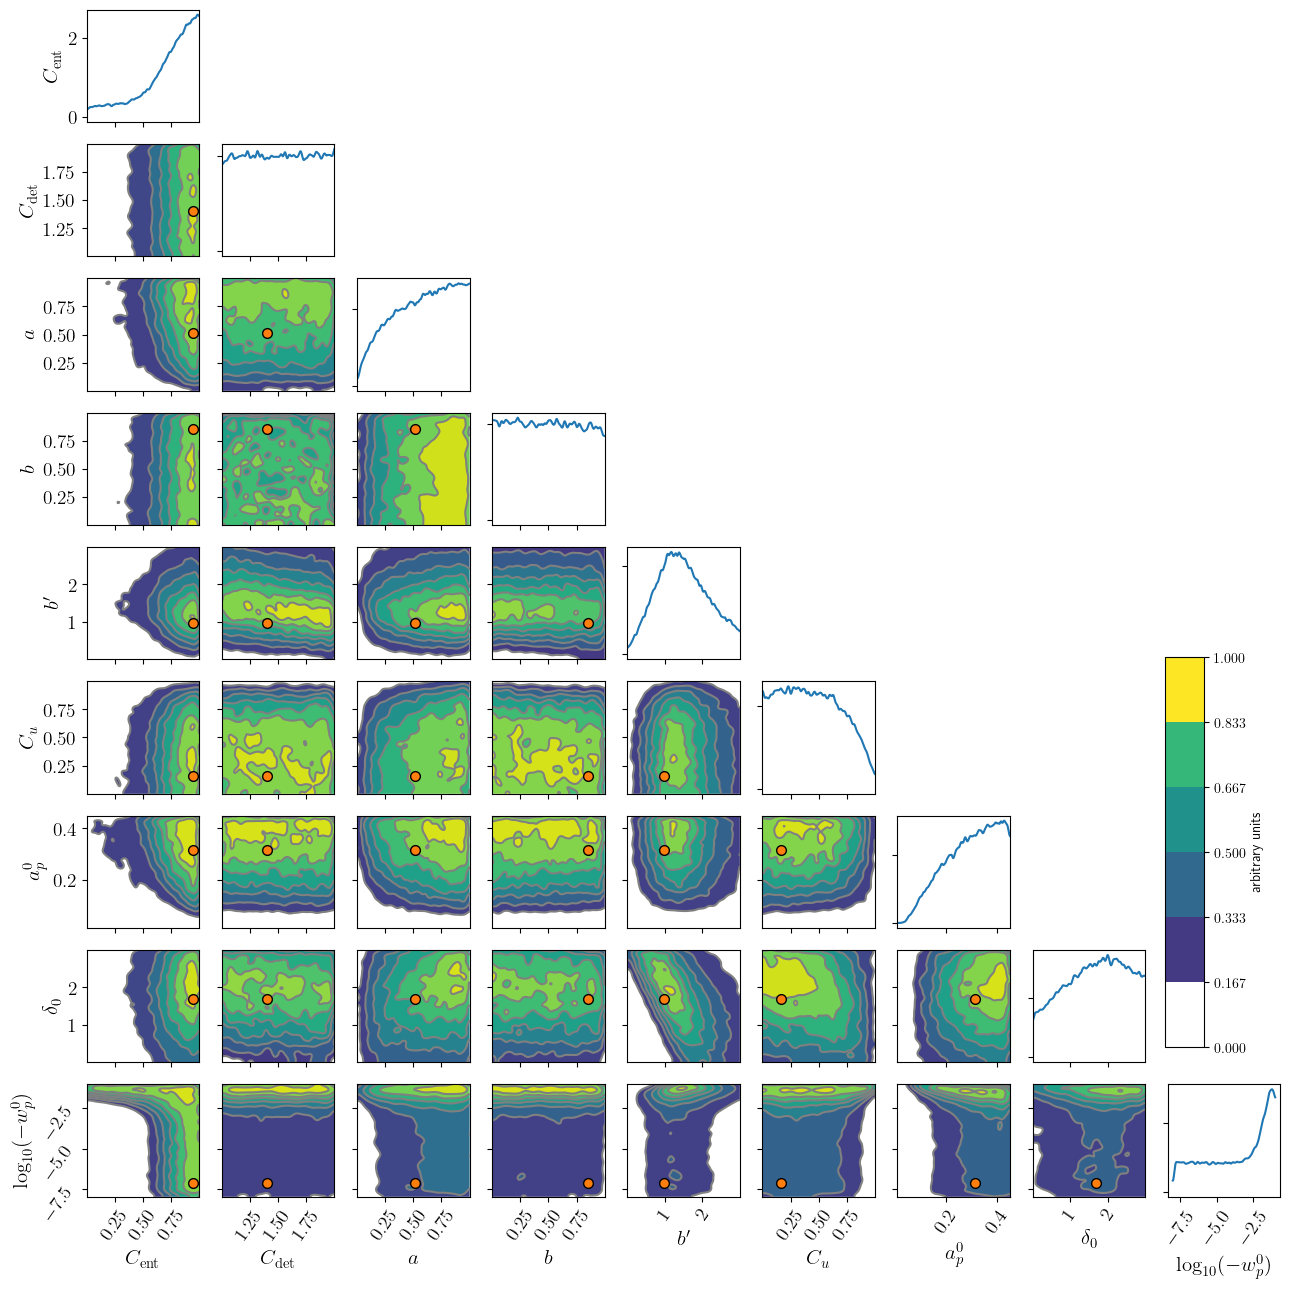

In [49]:
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
from matplotlib import ticker
from matplotlib.ticker import LogLocator
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.cm import ScalarMappable

# from likelihood_mesonh import likelihood_mesonh
plt.rcParams['text.usetex'] = True
plt.rcParams.update({'figure.facecolor':'white'})
plt.rcParams.update({'savefig.facecolor':'white'})
az.rcParams["plot.max_subplots"] = 200 #arviz has a default limitations of 8x8 subplots

## Load the data
data = az.from_netcdf('MCMC_output/MCMC_2024-12-05_09:05:18.950966.nc')

## convert to xarray dataset
ds = az.convert_to_dataset(data)

az.summary(data)
## compute the MAP estimate
max_index = int(ds.argmax()['likelihood'])

chain_length = ds['draw'].shape[0]

chain_nr = max_index // chain_length
draw_nr = max_index % chain_length

MAP = ds.isel(draw=draw_nr, chain=chain_nr)

Cent = float(MAP['Cent'].values)
Cdet = float(MAP['Cdet'].values)
delta_bkg = float(MAP['delta_bkg'].values)
up_c = float(MAP['up_c'].values)
wp_a = float(MAP['wp_a'].values)
wp_b = float(MAP['wp_b'].values)
wp_bp = float(MAP['wp_bp'].values)
bc_ap = float(MAP['bc_ap'].values)
log_wp_0 = float(MAP['log_wp_0'].values)

print(log_wp_0)

map_dic = {key:float(MAP[key].values) for key in MAP.keys()}  
del map_dic['likelihood']
del map_dic['wp_0']
# likelihood_mesonh(    
#     Cent      = Cent,
#     Cdet      =  Cdet,
#     wp_a      = wp_a,
#     wp_b      = wp_b,
#     wp_bp     = wp_bp,
#     up_c      = up_c, #we take up_c=vp_c
#     bc_ap     = bc_ap,
#     delta_bkg = delta_bkg,
#     wp0       = wp_0,
#     sobolev=False,
#     nan_file='nan_parameters.txt',
#     trace=True,
#     ret_log_likelihood=False,
#     )
# """
# Errors are:
# 1st data:
# - metric_t: 1.343877792850065e-05
# - metric_u: 3.416123222101756e-09
# - metric_v: 3.416123222101756e-09

# 2nd data:
# - metric_t: 6.2391438912764285e-06
# - metric_u: 4.836421614543722e-06
# - metric_v: 0.0001588768739522521
# """

# likelihood_mesonh(    
#     Cent      = 0.8985,
#     Cdet      =  1.827,
#     wp_a      = 0.9458,
#     wp_b      = 0.9488,
#     wp_bp     = 1.951,
#     up_c      = 0.2711, #we take up_c=vp_c
#     bc_ap     = 0.3673,
#     delta_bkg = 2.253,
#     wp0       = -7.874e-08,
#     sobolev=False,
#     nan_file='nan_parameters.txt',
#     trace=True,
#     ret_log_likelihood=False,
#     )
# """
# Errors are:
# 1st data:
# - metric_t: 1.6724557285266624e-05
# - metric_u: 3.416123222101756e-09
# - metric_v: 3.416123222101756e-09

# 2nd data:
# - metric_t: 4.404447965212885e-06
# - metric_u: 8.48592718610331e-06
# - metric_v: 0.0001588768739522521
# """



# az.rhat(data)

# az.plot_trace(data, var_names=["Cent"])
# plt.tight_layout()
# #plt.savefig('paper/figures/Cent_trace.png')
# plt.show()

# az.plot_autocorr(data, var_names=["Cent", "Cdet", "delta_bkg"])
# plt.show()




In [75]:
for i in enumerate(map_dic):
    print(key,i)

0 Cent
1 Cdet
2 wp_a
3 wp_b
4 wp_bp
5 up_c
6 bc_ap
7 delta_bkg
8 log_wp_0


In [77]:
#compute correlation matrix
corr = np.zeros((len(map_dic),len(map_dic)))
for i,ikey in enumerate(map_dic):
    for j,jkey in enumerate(map_dic):
        if j>i:
            corr[i,j] = np.array([[xr.corr(data.posterior[ikey][0], data.posterior[jkey][0])]])


/tmp/ipykernel_9385/742536767.py:60: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


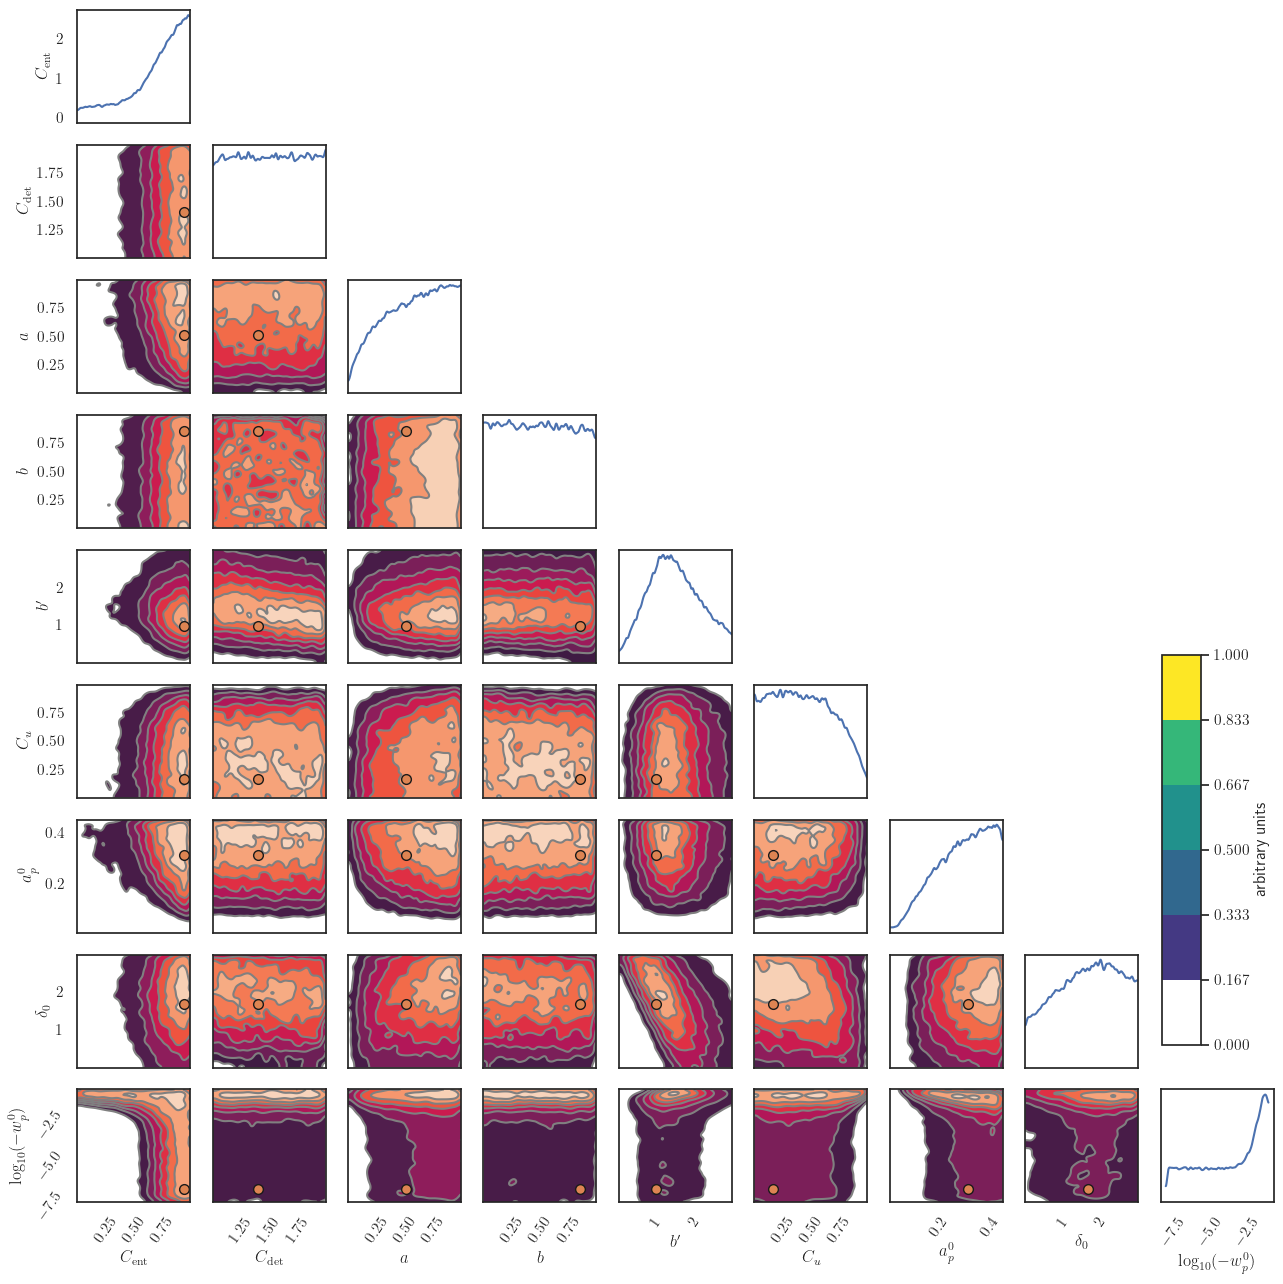

In [86]:


#--------- Pairplot
axes = az.plot_pair(data, var_names=['Cent', 'Cdet', 'wp_a', 'wp_b', 'wp_bp', 'up_c', 'bc_ap', 'delta_bkg', 'log_wp_0'], 
# kind='scatter', scatter_kwargs={'alpha':1/254,},
# kind='hexbin',
kind='kde', 
marginals=True,figsize=(13,13),reference_values=map_dic,divergences=True,reference_values_kwargs={'color':'C1','marker':'o','markersize':7,'alpha':1.})

#------------------------------------------------------
# Add a discrete colorbar

# Define discrete levels
levels = np.linspace(0, 1, 7)  # 7 discrete levels

# Create a custom colormap
cmap = plt.cm.viridis
colors = cmap(np.linspace(0, 1, len(levels)))  # Extract colors for the levels
colors[0] = [1, 1, 1, 1]  # Replace the first color with white (RGBA: 1, 1, 1, 1)
custom_cmap = ListedColormap(colors)

# Define the norm
norm = BoundaryNorm(boundaries=levels, ncolors=custom_cmap.N, extend='neither')
# Add a discrete colorbar
fig = plt.gcf()
cbar_ax = fig.add_axes([0.9, 0.19, 0.03, 0.3])  # Adjust position and size (e.g., smaller height)
sm = ScalarMappable(cmap=custom_cmap, norm=norm)
sm.set_array([])  # Required for the colorbar
cbar = fig.colorbar(sm, cax=cbar_ax, ticks=levels, label=r"arbitrary units")
#------------------------------------------------------
for i in range(9):
    axes[8,i].tick_params(labelrotation=55)
for ax in axes.flat:
    ax.set_box_aspect(1)

true_names = [r'$C_{\mathrm{ent}}$', r'$C_{\mathrm{det}}$', r'$a$', r'$b$', r'$b^\prime$',r'$C_u$',r'$a_p^0$',r'$\delta_0$',  r'$\mathrm{log}_{10}(-w_p^0)$']
for i in range(9):
    axes[i,0].set_ylabel(true_names[i])
    axes[8,i].set_xlabel(true_names[i])

#------------------------------------------------------
# Plotting correlations on the upper panels
# Generate a custom diverging colormap
# cmap = sns.diverging_palette(230, 20, as_cmap=True)

# for i,ikey in enumerate(map_dic):
#     for j,jkey in enumerate(map_dic):
#         if j>i:
#             ax = axes[i,j]
#             array = np.array([[corr[i,j]]])
#             # Plot the uniform square
#             im = ax.imshow(array, cmap=cmap, vmin=-1, vmax=1)
#             # Remove axis ticks and labels for better appearance
#             ax.set_xticks([])
#             ax.set_yticks([])

# # # Add a colorbar
# cbar = fig.colorbar(im)
# # cbar.set_label("Correlation")

#------------------------------------------------------
plt.tight_layout()
saving_name = 'figures/MCMC_pairplot_logwp0.pdf'
# plt.savefig(saving_name,bbox_inches='tight')

# plt.savefig('figures/MCMC_pairplot.png',bbox_inches='tight')
plt.show()

#------------------------------------------------------

# az.plot_forest(data, var_names=["Cent"], combined=True, hdi_prob=0.95, r_hat=True, ess=True);
# az.plot_forest(data, var_names=["Cdet"], combined=True, hdi_prob=0.95, r_hat=True, ess=True);
# az.plot_forest(data, var_names=["delta_bkg"], combined=True, hdi_prob=0.95, r_hat=True, ess=True);
# # az.plot_forest(trace, var_names=["likelihood"], combined=True, hdi_prob=0.95, r_hat=True, ess=True);

# plt.show()

[]

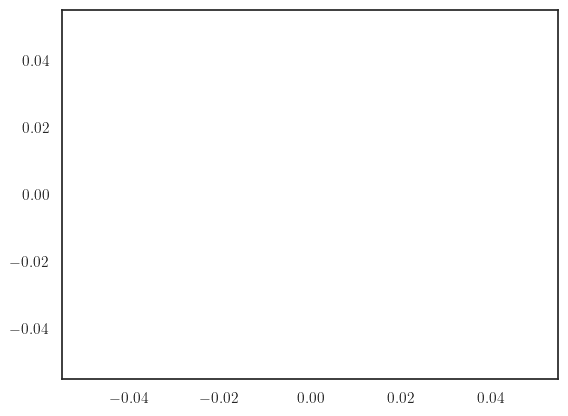

In [95]:
i,j=0,1
ax = axes[i,j]
array = np.array([[corr[i,j]]])
# Plot the uniform square
ax.imshow(array, cmap=cmap, vmin=-1, vmax=1)
# Remove axis ticks and labels for better appearance
ax.set_xticks([])
ax.set_yticks([])
plt.plot()

In [100]:
summary = az.summary(data)

2.137

In [54]:
from string import ascii_letters
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="white")

# Generate a large random dataset
rs = np.random.RandomState(33)
d = pd.DataFrame(data=rs.normal(size=(100, 26)),
                 columns=list(ascii_letters[26:]))

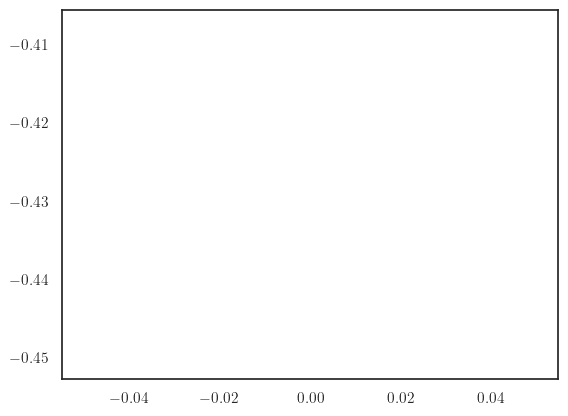

In [65]:
import xarray as xr
import seaborn as sns
corr = xr.corr(data.posterior['wp_bp'][0], data.posterior['delta_bkg'][0])


In [70]:
corr

<xarray.DataArray ()>
array(-0.42918006)
Coordinates:
    chain    int64 0

In [103]:
for i,key in enumerate(map_dic):
    axes[8,i].tick_params(labelrotation=55)
    axes[i,i].axvline(summary['mean'][key]+summary['sd'][key])
    axes[i,i].axvline(summary['mean'][key]-summary['sd'][key])

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
likelihood,-1.049551e+18,1.638408e+19,-1.188559e+17,1.706880e+17,1.268367e+18,8.984436e+17,361.0,38.0,1.84
Cent,7.160000e-01,2.390000e-01,2.160000e-01,1.000000e+00,2.000000e-03,2.000000e-03,10189.0,11707.0,1.00
Cdet,1.503000e+00,2.880000e-01,1.064000e+00,2.000000e+00,2.000000e-03,2.000000e-03,12377.0,18752.0,1.00
wp_a,5.870000e-01,2.610000e-01,1.530000e-01,1.000000e+00,2.000000e-03,2.000000e-03,12095.0,15678.0,1.00
wp_b,4.940000e-01,2.870000e-01,1.000000e-03,9.360000e-01,3.000000e-03,2.000000e-03,11447.0,17346.0,1.00
wp_bp,1.489000e+00,6.730000e-01,3.310000e-01,2.799000e+00,6.000000e-03,5.000000e-03,10389.0,11746.0,1.00
up_c,4.360000e-01,2.600000e-01,0.000000e+00,8.570000e-01,2.000000e-03,2.000000e-03,11543.0,15467.0,1.00
bc_ap,2.970000e-01,9.900000e-02,1.270000e-01,4.500000e-01,1.000000e-03,1.000000e-03,11521.0,14688.0,1.00
delta_bkg,1.649000e+00,8.030000e-01,3.150000e-01,3.000000e+00,7.000000e-03,5.000000e-03,10927.0,15885.0,1.00
log_wp_0,-3.699000e+00,2.137000e+00,-7.363000e+00,-1.001000e+00,2.100000e-02,1.500000e-02,9998.0,20534.0,1.00


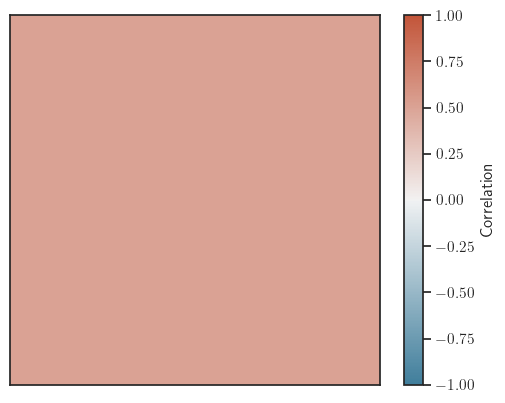

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Scalar value between -1 and 1
val = 0.5  # Example value

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Create a 1x1 array with the scalar value
array = np.array([[val]])

# Plot the uniform square
fig, ax = plt.subplots()
im = ax.imshow(array, cmap=cmap, vmin=-1, vmax=1)

# Add a colorbar
cbar = fig.colorbar(im, ax=ax)
cbar.set_label("Correlation")

# Remove axis ticks and labels for better appearance
ax.set_xticks([])
ax.set_yticks([])

plt.show()


In [53]:
d=data.posterior
# Compute the correlation matrix
corr = d.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

AttributeError: 'Dataset' object has no attribute 'corr'

In [97]:
import matplotlib.pyplot as plt
from data import convert_to_dataset
from plots.plot_utils import purge_duplicates, get_coords, _scale_fig_size
from posteriorplot import plot_posterior
from pairplot import plot_pair
from itertools import product


def gen_var_dims_list(data, var_names, coords):
    """Generate list of valid var_names and coords pairings
    """

    # If value for key in coords is string and not list of string(s),
    # parameter_list does not build properly
    for j in coords:
        if isinstance(coords[j], str):
            coords[j] = [coords[j]]

    posterior_data = convert_to_dataset(data, group="posterior")
    posterior_data = get_coords(posterior_data, coords)
    skip_dims = set()
    skip_dims = skip_dims.union({"chain", "draw"})
    var_dims_list = []
    for var_name in var_names:
        if var_name in posterior_data:
            new_dims = [dim for dim in posterior_data[var_name].dims if dim not in skip_dims]
            vals = [purge_duplicates(posterior_data[var_name][dim].values) for dim in new_dims]
            dims = [{k: v for k, v in zip(new_dims, prod)} for prod in product(*vals)]
            var_dims = [[var_name, d] for d in dims]

            var_dims_list += var_dims

    return var_dims_list


def plot_dist_diff(data, var_names, coords, textsize=None, figsize=None, ax=None, **kwargs):
    var_dims_list = gen_var_dims_list(data, var_names, coords)

    assert len(var_dims_list) == 2, "Too many parameters provided"

    (figsize, ax_labelsize, _, xt_labelsize, _, _) = _scale_fig_size(
        figsize, textsize, 1, 1
    )

    if ax is None:
        fig, ax = plt.subplots(figsize=figsize, constrained_layout=True)

    var_name_0 = var_dims_list[0][0]
    var_name_1 = var_dims_list[1][0]
    coord_0 = var_dims_list[0][1]
    coord_1 = var_dims_list[1][1]

    if len(coord_0) == 1:
        coord_0_suff = "_" + list(coord_0.values())[0]
    else:
        coord_0_suff = ""
    if len(coord_1) == 1:
        coord_1_suff = "_" + list(coord_1.values())[0]
    else:
        coord_1_suff = ""

    diff_DataArray = data.posterior[var_name_0].sel(coord_0) - data.posterior[
        var_name_1
    ].sel(coord_1)

    diff_var_name = f"{var_name_0}{coord_0_suff} - {var_name_1}{coord_1_suff}"

    data.posterior[diff_var_name] = diff_DataArray
    plot_posterior(data, var_names=[diff_var_name], ax=ax, **kwargs)


def pair_plot_extended(data, var_names, coords=None, lower_fun=plot_pair, upper_fun=None, diag_fun=plot_posterior,
                       lower_kwargs=None, upper_kwargs=None, diag_kwargs=None):
    if coords is None:
        coords = {}

    if lower_kwargs is None:
        lower_kwargs = {}

    if upper_kwargs is None:
        upper_kwargs = {}

    if diag_kwargs is None:
        diag_kwargs = {}

    var_dims_list = gen_var_dims_list(data, var_names, coords)
    fig, axes = plt.subplots(len(var_dims_list), len(var_dims_list), figsize=(10, 10))

    for i in range(len(var_dims_list)):
        for j in range(len(var_dims_list)):
            sub_var_name = purge_duplicates([var_dims_list[i][0], var_dims_list[j][0]])
            if len(var_dims_list[i][1]) > 0 and len(var_dims_list[j][1]) > 0:
                if list(var_dims_list[i][1].keys())[0] in var_dims_list[j][1]:
                    dict1 = var_dims_list[i][1]
                    dict2 = var_dims_list[j][1]
                    sub_coords = {
                        i: purge_duplicates(list(j))
                        for i in dict1.keys()
                        for j in zip(dict1.values(), dict2.values())
                    }
                else:
                    sub_coords = {**var_dims_list[i][1], **var_dims_list[j][1]}
            else:
                sub_coords = {**var_dims_list[i][1], **var_dims_list[j][1]}

            ax = axes[j, i]
            if i < j:
                if lower_fun is not None:
                    lower_fun(data, var_names=sub_var_name, coords=sub_coords, ax=ax, **lower_kwargs)
                else:
                    ax.axis("off")
            elif i > j:
                if upper_fun is not None:
                    upper_fun(data, var_names=sub_var_name, coords=sub_coords, ax=ax, **upper_kwargs)
                else:
                    ax.axis("off")
            elif i == j:
                if diag_fun is not None:
                    diag_fun(data, var_names=sub_var_name, coords=sub_coords, ax=ax, **diag_kwargs)
                else:
                    ax.axis("off")
    plt.tight_layout()

ImportError: cannot import name 'convert_to_dataset' from 'data' (unknown location)

/home/manolis/anaconda3/lib/python3.11/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


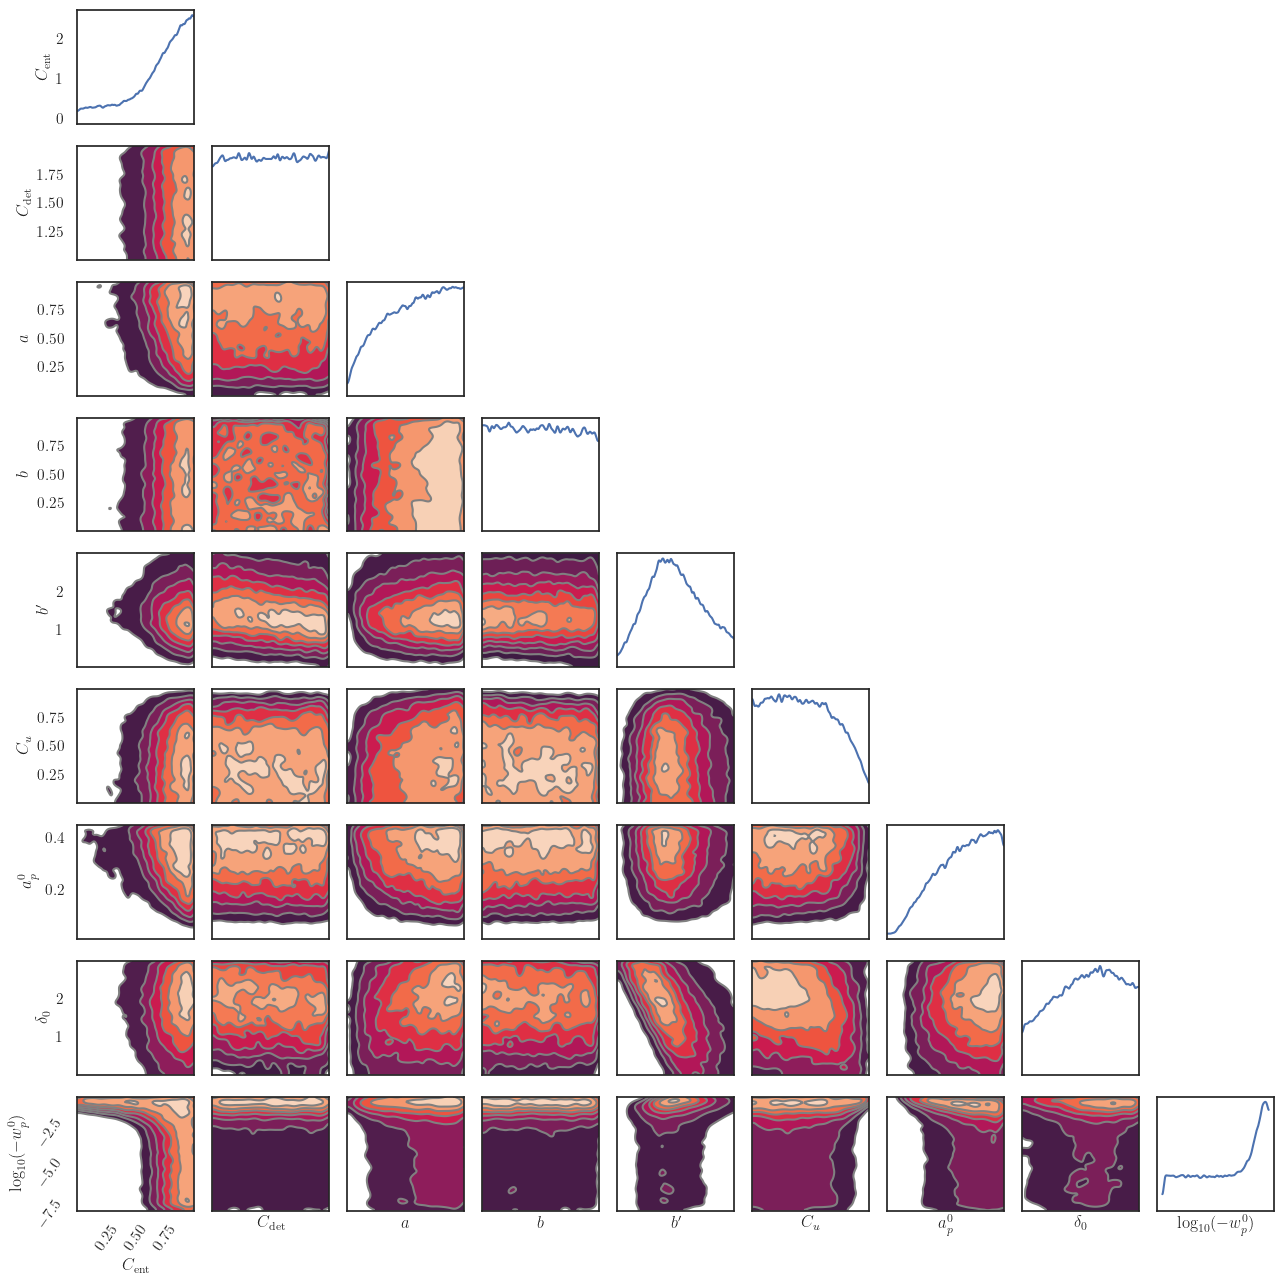

In [98]:
# -------- Pairplot
axes = az.plot_pair(
    data,
    var_names=['Cent', 'Cdet', 'wp_a', 'wp_b', 'wp_bp', 'up_c', 'bc_ap', 'delta_bkg', 'log_wp_0'],
    kind='kde',
    marginals=True,
    figsize=(13, 13),
    reference_values=None,
    divergences=True
)

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Plotting correlations as colored squares on upper panels
for i in range(len(axes)):
    for j in range(len(axes)):
        if j > i:  # Upper-diagonal subplots
            ax = axes[i, j]
            
            # Create a uniform square with color based on the correlation
            corr_value = corr[i, j]
            ax.imshow(
                [[corr_value]], 
                cmap=cmap, 
                vmin=-1, 
                vmax=1,
                extent=[0, 1, 0, 1]  # Scale to subplot's coordinate system
            )
            
            # Add correlation value as text
            ax.text(
                0.5, 0.5, f"{corr_value:.2f}",
                ha='center', va='center',
                fontsize=10, color='white' if abs(corr_value) > 0.5 else 'black'
            )
            
            # Remove ticks and labels for clean appearance
            ax.set_xticks([])
            ax.set_yticks([])

# Rotate ticks and relabel axes for lower-diagonal subplots
true_names = [
    r'$C_{\mathrm{ent}}$', r'$C_{\mathrm{det}}$', r'$a$', r'$b$', r'$b^\prime$',
    r'$C_u$', r'$a_p^0$', r'$\delta_0$', r'$\mathrm{log}_{10}(-w_p^0)$'
]
for i in range(len(axes)):
    axes[-1, i].tick_params(labelrotation=55)
    axes[i, 0].set_ylabel(true_names[i])
    axes[-1, i].set_xlabel(true_names[i])

plt.tight_layout()
plt.show()